In [23]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [24]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [25]:
# Just for Understanding
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# K-means

* n_clusters = The number of clusters to form as well as the number of centroids to generate.
* n_init = Number of times the k-means algorithm is run with different centroids 
* max_iter = Maximum number of iterations of the k-means algorithm for a single run.

In [26]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)

all_predictions = model.predict(x)
centroids = model.cluster_centers_

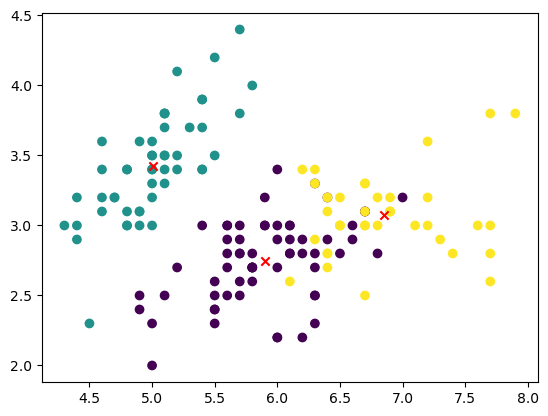

In [27]:

plt.scatter(x[:,0], x[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="red")
plt.show()

# K-means with PCA

In [28]:
from sklearn.decomposition import PCA

iris = datasets.load_iris()
x2 = iris.data
y2 = iris.target

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x2)

In [29]:
x_pca.shape

(150, 2)

In [30]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x_pca)

all_predictions = model.predict(x_pca)
centroids = model.cluster_centers_

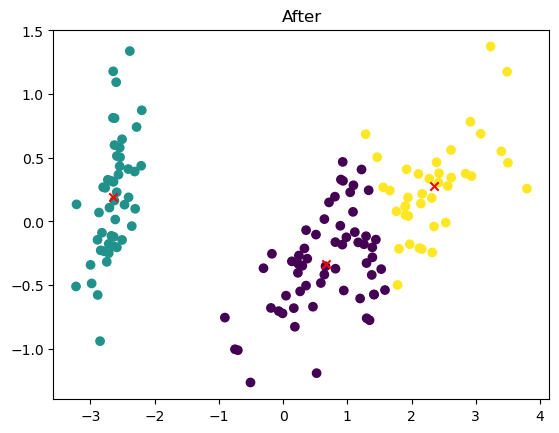

In [20]:

plt.scatter(x_pca[:,0], x_pca[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="red")
plt.title('After')
plt.show()